# What is clustering?
An unsupervised learning technique that groups similar observations in a data set together.
Each group is referred to as a cluster.

# New Techniques
1. os.scandir - alternative to listdir.
            - yields not just the file name but other attributes of the file.

In [5]:
from os import scandir

result = scandir(".")
for obj in result:
    print(obj.name)
    print(obj.path, "\n")

LICENSE
./LICENSE 

flowers
./flowers 

README.md
./README.md 

CS166_Project4.ipynb
./CS166_Project4.ipynb 

flower_features.pkl
./flower_features.pkl 

practice_notebook.ipynb
./practice_notebook.ipynb 

.ipynb_checkpoints
./.ipynb_checkpoints 

venv
./venv 

.git
./.git 

.idea
./.idea 


2. os.chdir - changes the current directory to the specified directory passed as argument.
3. os.getcwd - returns the current working directory

In [1]:
from os import chdir, getcwd

print("Before chdir:", getcwd())

chdir("/")

print("After chdir:", getcwd())

Before chdir: /Users/francisohara/DataspellProjects/cs166-project-4-image-clustering-based-on-similarity-francisohara24-main
After chdir: /


4. keras.preprocessing.image.load_img - accepts path to an image and loads image as Pillow Image objects.

2023-10-30 21:44:48.662846: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


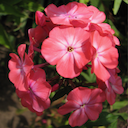

In [1]:
from keras.preprocessing.image import load_img


img_path = "./flowers/0001.png"
img = load_img(img_path)
img

5. Pillow images can be converted into numpy arrays using the numpy.array()

In [7]:
import numpy as np

img_array = np.array(img)
type(img_array)

# Insights
# np.array() is a function that accepts a variety of things from Pillow images to Python lists, sets, etc. and knows how to convert them into an Numpy ndarray. Essentially processes the object first before calling the .ndarray constructor.

numpy.ndarray

6. Numpy ndarray dimensions vs. Pillow Image dimensions
 - Image.size: dimensions of Pillow image
 - Image.resize(): change dimensions of Pillow image
 - np.ndarray.shape: dimensions of numpy nd-array
 - np.ndarray.reshape: change the dimensions of the numpy nd-array

In [9]:
# using existing objects
print(img.size)

print(img_array.shape)

print(img_array.size) # gives total no. of data points, not dimensions

(128, 128)
(128, 128, 3)
49152


7. Tensors - In Deep Learning, the input data to be passed through the neural network is usually stored as a tensor.
            - The output results to be produced by the neural network are also expressed in the form of tensors.

#### Architecture of a Neural Network
1. Layers: The neural network consists of multiple layers.
2. Neurons: Each layer contains a set of neurons.
 - Each neuron has an associated weight and bias.
 - The bias of the neuron is adjusted during the training process to closely make the neurons more accurate.

**Kinds of Layers in a Neural Network**
1. *Input layer* - This layer contains the input neurons (the data that is inputted into the DL model)
2. *Hidden layers* - These are intermediate layers of neurons that perform computations on the input neurons before they finally arrive at the output neuron.
3. *Output layer* - This layer contains the output neurons(the resulting data/predictions we are looking for.) .

## Task 3: Write a function

In [7]:
from os import listdir
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
import numpy as np



def extract_features(file, model):
    # load the image
    image = load_img(file, target_size = (224, 224))
    
    # convert to numpy array
    image = np.array(image)

    # reshape the image numpy array to keep track of the number of the image in list of images
    image = image.reshape((1, 224, 224, 3))
    
    # preprocess the image so it's similar to the inputs of vgg16 model
    prepared_image = preprocess_input(image)

    # instantiate new model from `model` (vgg16 or model of choice) with same inputs as `model` and the outputs of the second to last layer of `model`?
    new_model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
    
    # use new_model to process our image into data set with columns whose similarities are easier to compare so we can group images together.
    features = new_model.predict(prepared_image, use_multiprocessing=True)
    
    return features

In [9]:
# test extract_features
# extract the paths to the images to be processed into features.
image_paths = [ filename for filename in listdir("flowers") if filename.endswith(".png") ]

# instantiate the model for extracting the features
model = VGG16()

# test with the first image in `image_paths`
features = extract_features("./flowers/" + image_paths[0], model)

features

1/1 [==============================] - 0s 372ms/step


array([[0., 0., 0., ..., 0., 0., 0.]], dtype=float32)